In [ ]:
라이브러리 임포트

In [1]:
from PIL import Image
from skimage.io import imread, imshow, show
from skimage.color import rgb2gray
from scipy import ndimage, misc, signal, fftpack

import matplotlib.pylab as pylab
import numpy as np
import timeit # 수행 시간 체크

# scipy 1.1 버전부터 signaltonoise() 함수 제공되지 않음
# 아래 함수 구현으로 사용함
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

In [ ]:
HPF 구현

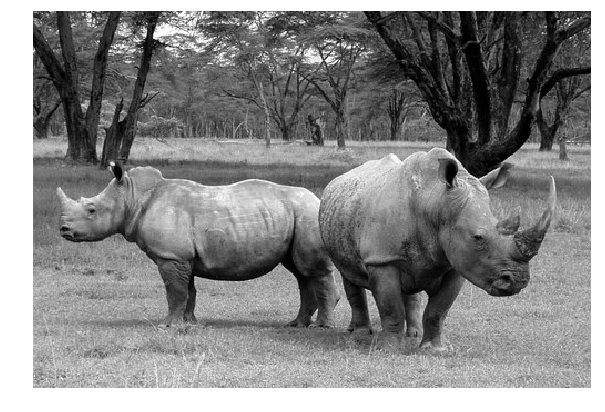

In [16]:
im = np.array(Image.open('../images/rhino.jpg').convert('L'))
pylab.figure(figsize=(10,10)), pylab.imshow(im, cmap='gray'), pylab.axis('off')
pylab.show()

In [ ]:
코뿔소 영상 스펙트럼 표시(로그 도메인)

C:\Users\bae22\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


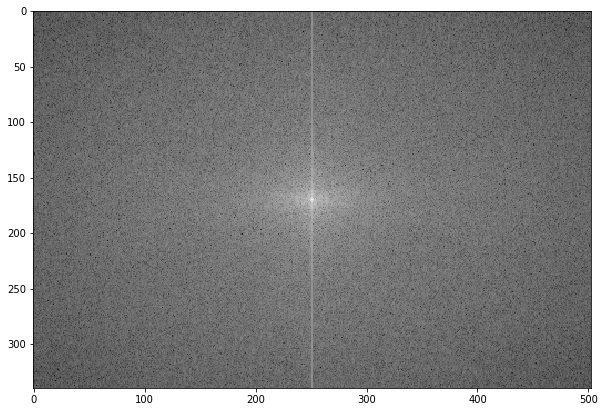

In [17]:
freq = fp.fft2(im) # FFT 수행
freq1 = np.copy(freq)
freq2 = fp.fftshift(freq1) # shift 수행

mag = (20*np.log10( 0.1 + freq2)).astype(int)
pylab.figure(figsize=(10,10)), pylab.imshow(mag)
pylab.show()

In [ ]:
저주파를 차단 스펙트럼 영상

C:\Users\bae22\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


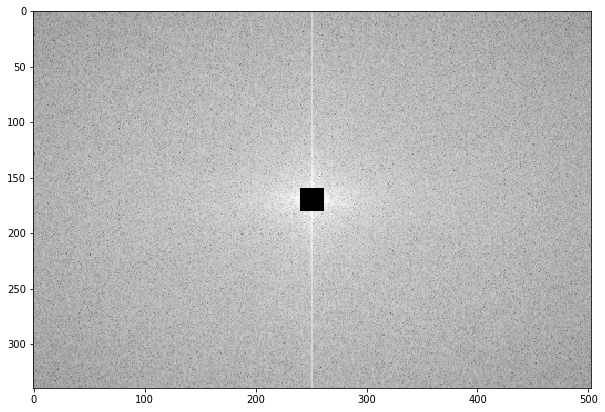

In [18]:
(w, h) = freq.shape
half_w, half_h = w//2, h//2 # 중심 좌표
# 20 × 20 크기 저주파 영역 계수값 제거
freq2[half_w-10:half_w+11, half_h-10:half_h+11] = 0

pylab.figure(figsize=(10,10))
pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int))
pylab.show()

In [ ]:
ifft2() 함수 적용, 스펙트럼 영상

0.5901647786775175


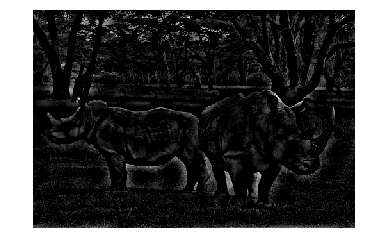

In [19]:
im1 = fp.ifft2(fftpack.ifftshift(freq2))
im2 = np.clip(im1.real,0,255) # IFFT후 화소 값 클램핑 수행
print(signaltonoise(im2, axis=None)) # 0.5901647786775175

pylab.imshow(im2, cmap='gray'), pylab.axis('off')
pylab.show()

In [ ]:
주파수 컷오프 값 F사용

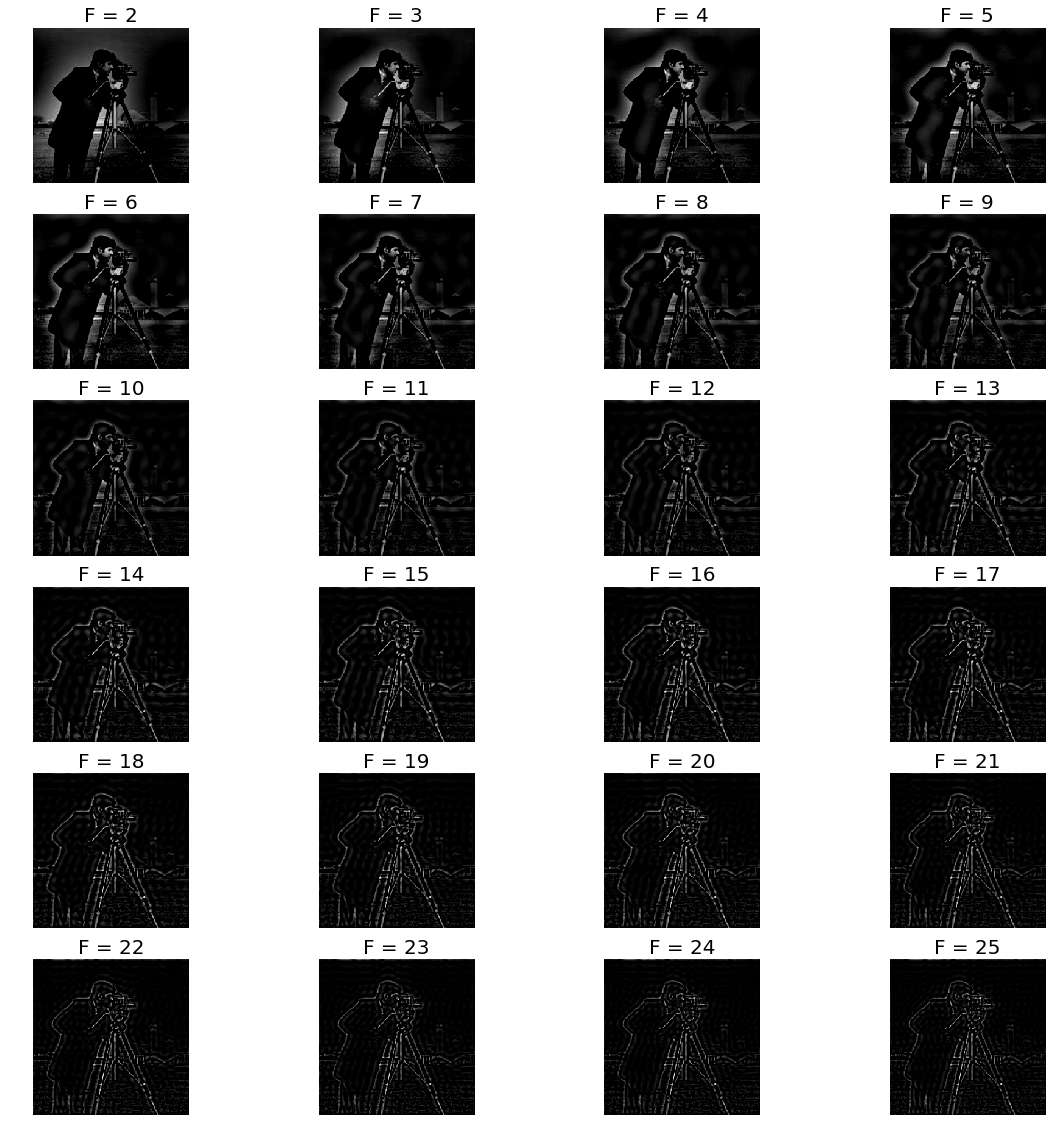

In [23]:
im = np.array(Image.open('../images/cameraman.jpg').convert('L'))
freq = fp.fft2(im)
(w, h) = freq.shape
half_w, half_h = w//2, h//2 # 중심 좌표 – DC 위치
snrs_hp = [] # 신호대 잡음비 저장
lbs = list(range(1,25))

pylab.figure(figsize=(20,20))
for l in lbs:
    freq1 = np.copy(freq)
    freq2 = fftpack.fftshift(freq1) # shift 수행
    freq2[half_w-l:half_w+l+1,half_h-l:half_h+l+1] = 0 # 저주파 영역 계수 제거
    im1 = np.clip(fp.ifft2(fftpack.ifftshift(freq2)).real,0,255) # 클리핑
    snrs_hp.append(signaltonoise(im1, axis=None))
    
    pylab.subplot(6,4,l), pylab.imshow(im1, cmap='gray'), pylab.axis('off')
    pylab.title('F = ' + str(l+1), size=20)
    pylab.subplots_adjust(wspace=0.1, hspace=0.2)
    
pylab.show()

In [ ]:
컷오프 주파수에 따라 SNR이 어떻게 변하는가?

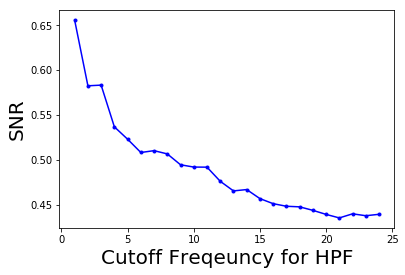

In [24]:
pylab.plot(lbs, snrs_hp, 'b.-')
pylab.xlabel('Cutoff Freqeuncy for HPF', size=20)
pylab.ylabel('SNR', size=20)
pylab.show()